### Imports


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import re
import datetime as dtime
import calendar as cal

### Preparing DataFrame

In [2]:
sales_df = pd.DataFrame()

In [3]:
for filename in os.listdir('./data'):
    monthly_data = pd.read_csv(f'./data/{filename}')
    sales_df = pd.concat([sales_df, monthly_data])

### Getting to know data

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
sales_df.describe() # no nums 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## First workarounds and data cleaning

In [7]:
sales_df.dropna(inplace=True)

In [8]:
sales_df.set_index(sales_df['Order ID'], inplace=True)

In [9]:
sales_df = sales_df.drop(columns=['Order ID'])

Checking if we can easily convert order date column with to_datetime function. Checking if all of the data in date column has the same pattern and not some dummy non-date like data.

In [10]:
sales_df[~sales_df['Order Date'].str.contains('[0-9]{2}/[0-9]{2}/[0-9]{2}\s[0-9]{2}:[0-9]{2}', regex=True)]

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
sales_df.drop_duplicates(inplace=True) # remove dups

In [12]:
sales_df.drop(index='Order ID', inplace=True) # remove the remaining non-date like row

In [13]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date']) # now we safely convert everything to datetime object

Adding some additional columns to make our life easier when dealing with date.

In [14]:
sales_df['Month'] = pd.DatetimeIndex(sales_df['Order Date']).month
sales_df['Day'] = pd.DatetimeIndex(sales_df['Order Date']).day
sales_df['Year'] = pd.DatetimeIndex(sales_df['Order Date']).year

In [15]:
sales_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,2019
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,2019
176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,2019
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,2019
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,2019
...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,17,2019
259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019
259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,23,2019


**Q1. What was the best month for sales? How much was earned that month?**

To answer this we need add another column - sales. The problem is that our numerical data is not really that numerical. The .info() shows that the data we need is object-type.

In [16]:
sales_df.info() # we want quantity ordered and price each, they are not numerical.

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 176558 to 259357
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185686 non-null  object        
 1   Quantity Ordered  185686 non-null  object        
 2   Price Each        185686 non-null  object        
 3   Order Date        185686 non-null  datetime64[ns]
 4   Purchase Address  185686 non-null  object        
 5   Month             185686 non-null  int64         
 6   Day               185686 non-null  int64         
 7   Year              185686 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 12.8+ MB


In [17]:
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])

In [18]:
sales_df.info() # now we are ready to go

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 176558 to 259357
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185686 non-null  object        
 1   Quantity Ordered  185686 non-null  int64         
 2   Price Each        185686 non-null  float64       
 3   Order Date        185686 non-null  datetime64[ns]
 4   Purchase Address  185686 non-null  object        
 5   Month             185686 non-null  int64         
 6   Day               185686 non-null  int64         
 7   Year              185686 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 12.8+ MB


In [19]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']

In [20]:
sales_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,2019,23.90
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,2019,99.99
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,600.00
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,11.99
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,2019,11.99
...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,17,2019,8.97
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,700.00
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,23,2019,700.00


Let's rearrange some columns position to make it more easier to read.

In [21]:
sales_df = sales_df[['Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address', 'Day', 'Month', 'Year']]

In [22]:
sales_df

,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Day,Month,Year
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019
...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17,9,2019
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1,9,2019
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23,9,2019


We can easily answer the Q1 with by gruping our data by month.


In [23]:
by_month = sales_df.groupby('Month')
keys = ['Quantity Ordered', 'Sales'] # columns that we are intrested in.

In [24]:
sales_summary = by_month[keys].sum() # summary of intrested keys for each month
sales_summary.index = sales_summary.index.map(lambda x: cal.month_name[x]) # change month numbers to month names

Which month was the best, the most profitable?


In [25]:
sales_summary.sort_values(by='Sales', ascending=False).head(1) # December was the most profitable.

,Quantity Ordered,Sales
Month,,
December,28074,4608295.7


Which month was the worst, the least profitable?


In [26]:
sales_summary.sort_values(by='Sales', ascending=True).head(1) # January was the worst.

,Quantity Ordered,Sales
Month,,
January,10893,1821413.16


We can plot the results to show them in more read-able way.

<AxesSubplot:xlabel='Month', ylabel='Sales in milions (USD $)'>

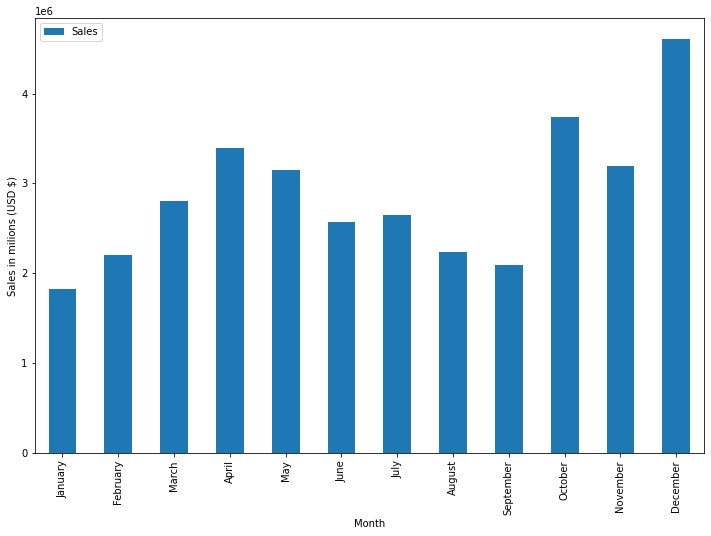

In [27]:
sales_summary.plot(kind='bar', y='Sales', figsize=(12, 8), ylabel='Sales in milions (USD $)')

**MQ1. Show on chart how the ordered quantity changed during the whole year.**

<AxesSubplot:xlabel='Month'>

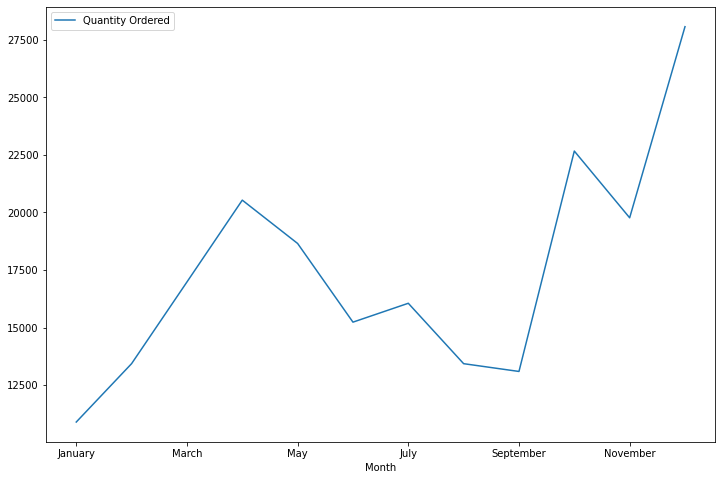

In [28]:
sales_summary.plot(kind='line', use_index=True, y='Quantity Ordered', figsize=(12, 8))

**Q2. What city had the highest number of sales?**

In [29]:
#pattern = re.compile('(?<=,\s)[^,]+')
#sales_df['City'] = sales_df['Purchase Address'].map(lambda x: pattern.findall(x)[0])

sales_df['City'] = sales_df['Purchase Address'].map(lambda x: x.split(',')[1]) # add city column to for grouping

C:\Users\karmi\AppData\Local\Temp\ipykernel_17448\3819730062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['City'] = sales_df['Purchase Address'].map(lambda x: x.split(',')[1]) # add city column to for grouping


In [30]:
sales_df

,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Day,Month,Year,City
Order ID,,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,Dallas
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,Boston
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,Los Angeles
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,Los Angeles
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17,9,2019,Los Angeles
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1,9,2019,San Francisco
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23,9,2019,San Francisco


We have to take also the state for particular city because there can be many cities with the same name but in different states across the USA.

In [31]:
sales_df['City'] = sales_df['Purchase Address'].map(lambda x: f"{x.split(',')[1]} ({x.split(',')[2][1:3]})")

C:\Users\karmi\AppData\Local\Temp\ipykernel_17448\75366528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['City'] = sales_df['Purchase Address'].map(lambda x: f"{x.split(',')[1]} ({x.split(',')[2][1:3]})")


In [32]:
by_city = sales_df.groupby('City')

In [33]:
csales_summary = by_city[keys].sum()

In [34]:
csales_summary.sort_values(by='Sales', ascending=False).head(1) # the best

,Quantity Ordered,Sales
City,,
San Francisco (CA),50169,8254743.55


In [35]:
csales_summary.sort_values(by='Sales', ascending=True).head(1) # the worst

,Quantity Ordered,Sales
City,,
Portland (ME),2746,449321.38


<AxesSubplot:xlabel='City', ylabel='Sales in milions (USD $)'>

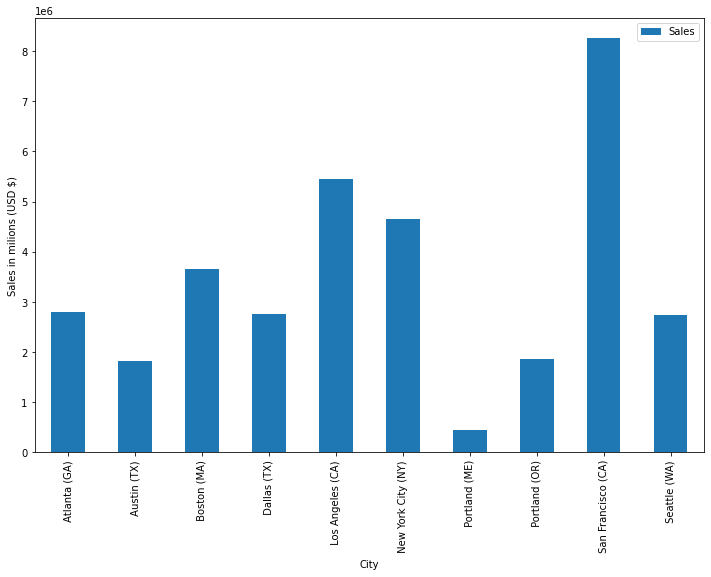

In [36]:
csales_summary.plot(kind='bar', y='Sales', figsize=(12, 8), ylabel='Sales in milions (USD $)')

**Q3. What time should we display advertisements to maximize likelihood of customer's buying product?**

In [42]:
sales_df['Hour'] = sales_df['Order Date'].dt.hour # this way it is easy to answer our question, we can group by hour.

C:\Users\karmi\AppData\Local\Temp\ipykernel_17448\661032280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Hour'] = sales_df['Order Date'].dt.hour


In [44]:
by_hour = sales_df.groupby('Hour')

In [54]:
bsales_summary = by_hour[keys].sum()

In [56]:
bsales_summary.sort_values(by=keys, ascending=True).head(1) # worst hour

,Quantity Ordered,Sales
Hour,,
3,927,145742.94


In [55]:
bsales_summary.sort_values(by=keys, ascending=False).head(1) # best hour

,Quantity Ordered,Sales
Hour,,
19,14451,2411971.14


<AxesSubplot:xlabel='Hour', ylabel='Quantity of orders'>

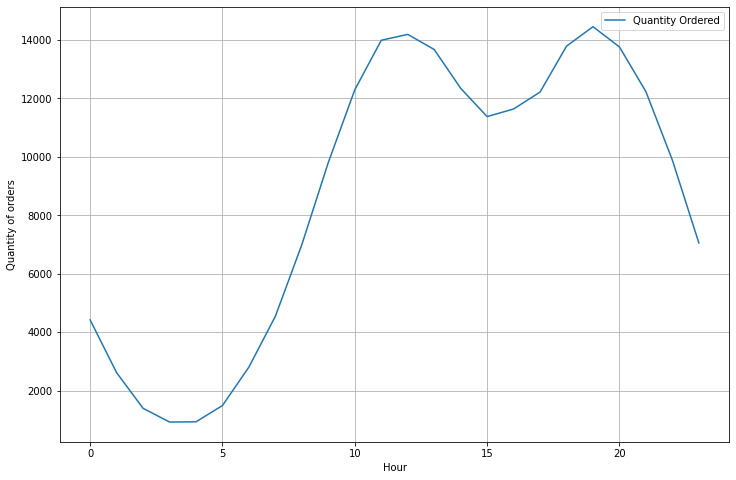

In [66]:
bsales_summary.plot(kind='line', y='Quantity Ordered', figsize=(12, 8), ylabel='Quantity of orders', grid=True)

We can see that the best hours for ads are in range of 10am-8pm, because these hours are the most occupied by customers based on the number of orders.

**Q4. What products are most often sold together?**

In [67]:
sales_df

,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Day,Month,Year,City,Hour
Order ID,,,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,Dallas (TX),8
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,Boston (MA),22
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,Los Angeles (CA),14
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,Los Angeles (CA),14
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",17,9,2019,Los Angeles (CA),20
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1,9,2019,San Francisco (CA),16
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",23,9,2019,San Francisco (CA),7


In [112]:
big_orders_ids = sales_df.index[sales_df.index.duplicated()] # getting order ids of bigger orderds which consist of more than 1 product

In [114]:
big_orders_df = sales_df.loc[big_orders_ids] # creating new dataframe to make our life easier, passing ids of bigger orders.

In [121]:
by_orderids = big_orders_df.groupby('Order ID') # grouping by order id so we have all data records for every order

In [137]:
big_orders_df['Grouped'] = by_orderids['Product'].apply(lambda x: ','.join(x)) # adding new column by applying function which concatenate product strings from all matching order ids (thank you to group by).

Now the problem is that one combination of product for specific order appears as many times as the number of ordered products. It can make the results messy. We are interested in unique order ids and Grouped column for them.

In [157]:
big_orders_final = big_orders_df.reset_index().drop_duplicates(subset='Order ID') # we have to reset index so Order ID becomes normal column and now we can safely remove rows where order ids are duplicated which gives us exactly what we wanted, we still have combinations of products in Grouped column and now it fixes our problem with many occurences.

In [347]:
from itertools import combinations # so we find all the combinations of our pair products
from collections import Counter # to count the number of combinations and present it in dict object

count = Counter()

for row in big_orders_final['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

pairs_results = dict(count.most_common(10)) 

In [250]:
pairs_results_df = pd.DataFrame(data=pairs_results.items())

In [259]:
pairs_results_df[0] = pairs_results_df[0].apply(lambda x: ', '.join(x))

In [262]:
pairs_results_df.rename(columns={0:'Products', 1:'Orders'}, inplace=True)

<AxesSubplot:xlabel='Products'>

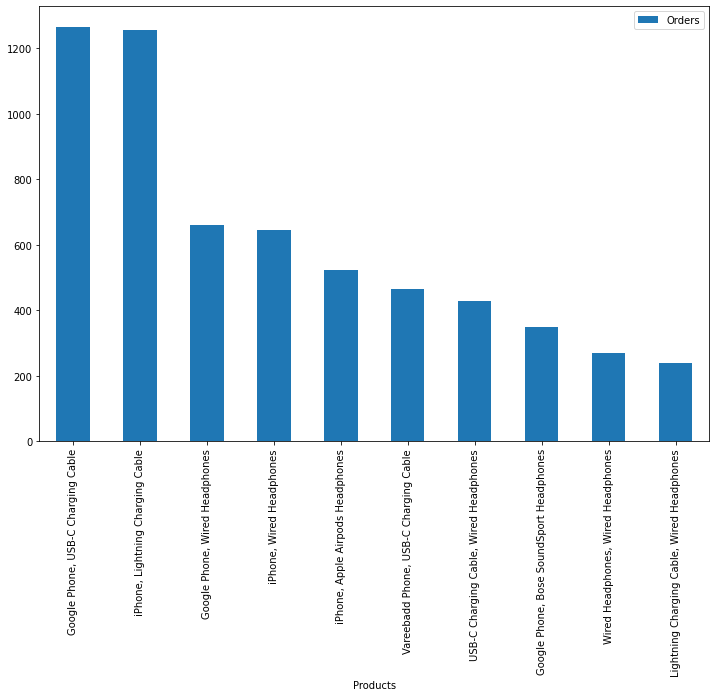

In [336]:
pairs_results_df.plot.bar(x='Products', figsize=(12, 8))